In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
df = pd.read_csv('data.csv')
# X = hours , t = Scores and converting them to numpy array
# X design metrix
X_ori = np.array(df['Hours']).reshape(-1,1) # size N*1
t = np.array(df['Scores']).reshape(-1,1) # size N*1
print(X_ori.shape , t.shape)
N = X_ori.shape[0]
D = X_ori.shape[1]
#Append 1 to remove a separate bias term
X = np.append(X_ori , np.ones((N,1)) , axis = 1) # both same
# X = np.append(X_ori , np.ones_like(X_ori) , axis = 1 ) # both same
D = D + 1
w = np.zeros((D,1))
print(X.shape , t.shape , w.shape)
#lr = 0.01 #learning rate
lr = 1e-2 #learning rate change and try again
loss = []
nepoches = 50
bs = 8
#If bs = 1 , minibatch gradient descent becomes socastic gradient descent
for i in range(nepoches):
  #create a batch
  ind = random.sample(list(range(N)),bs)
  Xbatch = X[ind]
  tbatch = t[ind]
  #Prediction
  y = Xbatch.dot(w)
  dldw = (Xbatch.T).dot(y-tbatch)/bs
  w = w - lr * dldw
  loss.append(((y-tbatch)**2).mean())

(25, 1) (25, 1)
(25, 2) (25, 1) (2, 1)


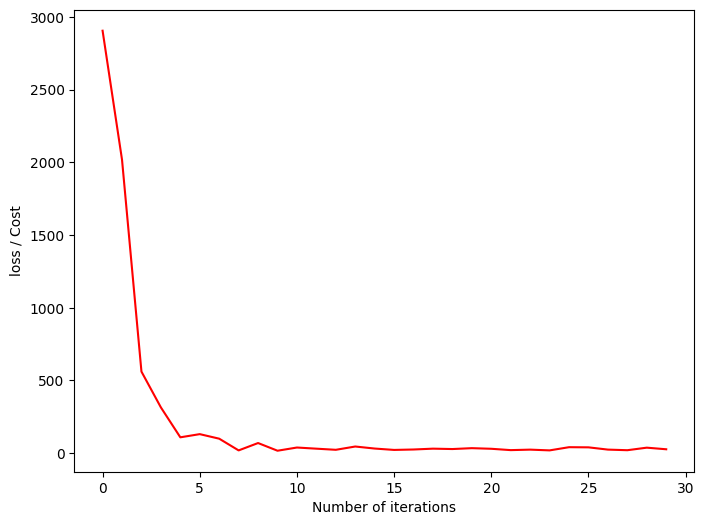

In [7]:
#plot loss
fig = plt.figure(figsize = (8,6))
plt.plot([i for i in range(nepoches)],loss,'r-')
plt.xlabel('Number of iterations')
plt.ylabel('loss / Cost')
plt.show()